# Banknote Fraud Detection with SVM

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [2]:
df = pd.read_csv('mall_data.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Pre-Processing

In [3]:
from sklearn.preprocessing import StandardScaler

df_x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_x)

### Plot relations

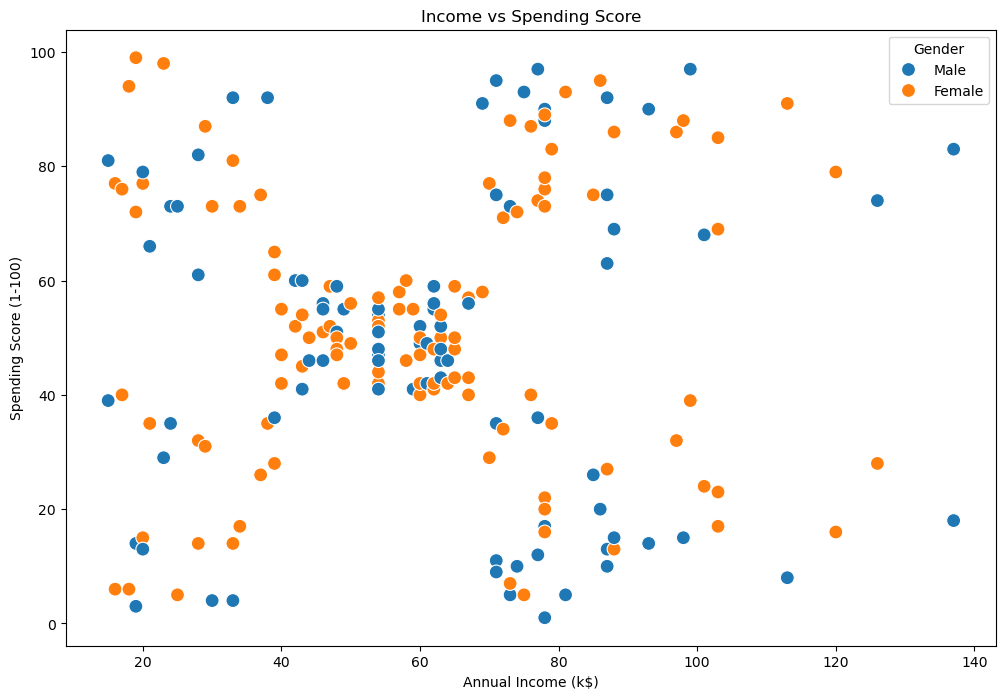

In [4]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender',
    s=100)
plt.title("Income vs Spending Score")
plt.show()

### Finding the best K with the Elbow Method

In [5]:
# remove annoying warning
import warnings
warnings.filterwarnings('ignore')


from sklearn.cluster import KMeans

  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.

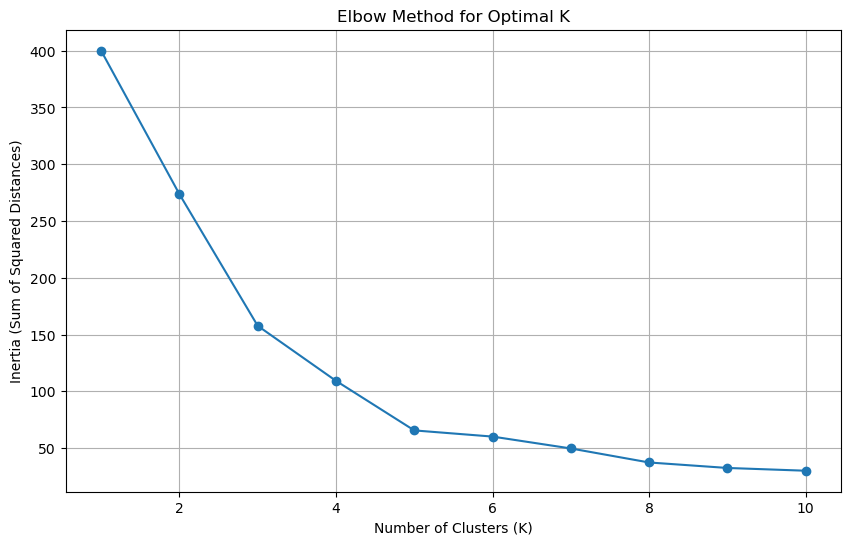

In [6]:
inertia = []
for k in range(1, 11):
    k_means = KMeans(n_clusters=k, random_state=42)
    k_means.fit(df_x_scaled)
    inertia.append(k_means.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

### Modeling

In [7]:
k_means = KMeans(n_clusters=5, random_state=42)
cluster_labels = k_means.fit_predict(df_x_scaled)

### Data modification

In [8]:
df['Cluster'] = cluster_labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


### Calculate mean values for each cluster

In [9]:
cluster_means = df.drop('Gender', axis=1).groupby('Cluster').mean()

cluster_means.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,86.320988,42.716049,55.296296,49.518519
1,162.000000,32.692308,86.538462,82.128205
2,23.090909,25.272727,25.727273,79.363636
3,164.371429,41.114286,88.200000,17.114286
4,23.000000,45.217391,26.304348,20.913043


In [10]:
cluster_counts = df['Cluster'].value_counts().sort_index()
print("\nCustomer Count per Cluster:")
print(cluster_counts)


Customer Count per Cluster:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


### Plot the data with clusters added

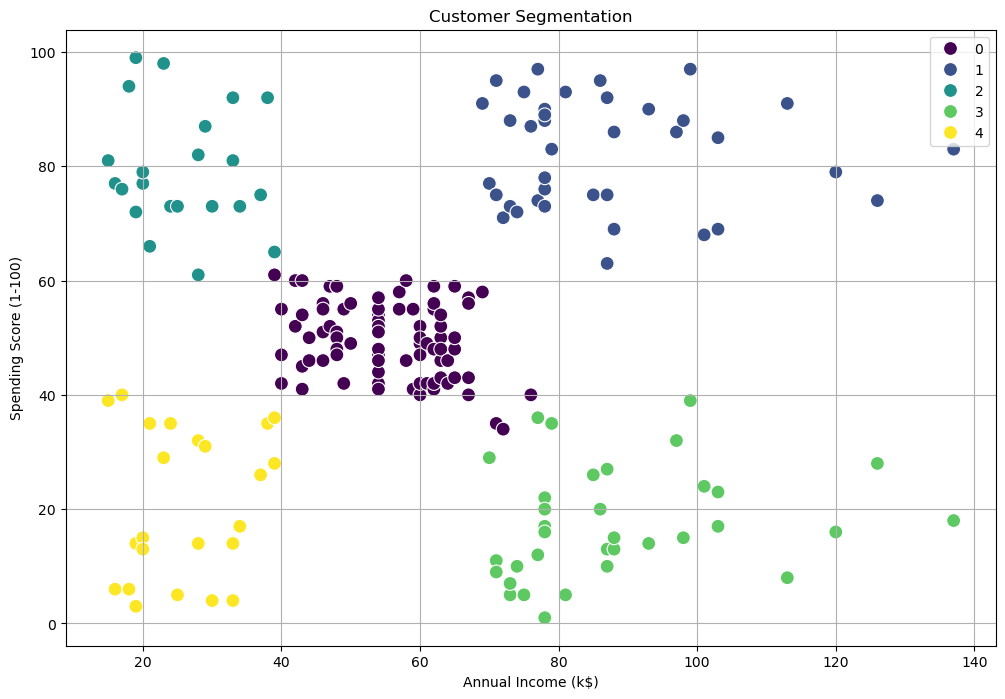

In [11]:
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis',
    s=100
)
plt.title('Customer Segmentation')
plt.legend()
plt.grid()
plt.show()